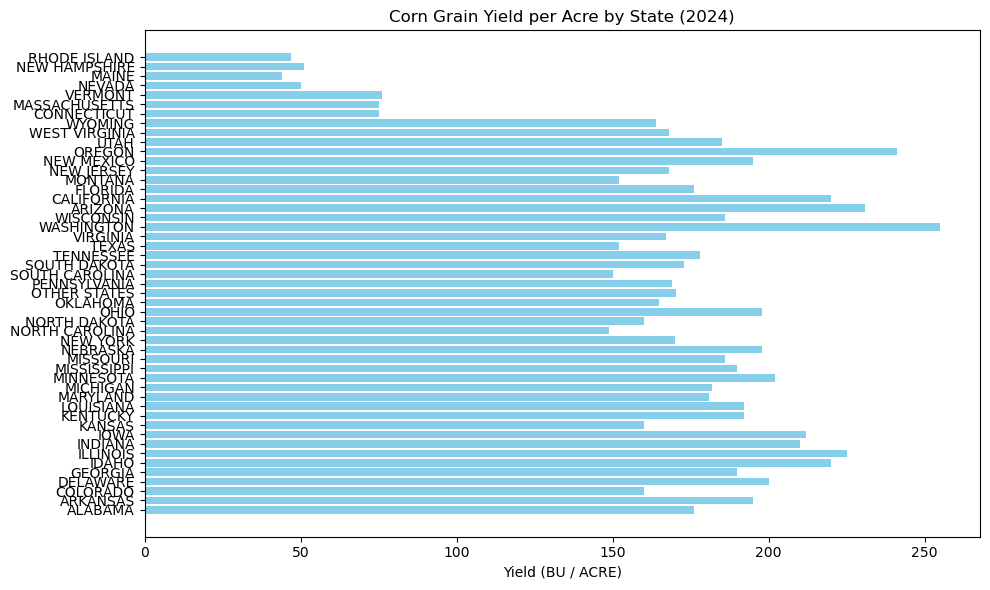

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
file_path = './Corn Yield by State(in).csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Filter to keep only relevant rows for corn yield
corn_yield_df = df[df['Data Item'] == 'CORN, GRAIN - YIELD, MEASURED IN BU / ACRE']

# Plot
plt.figure(figsize=(10, 6))
plt.barh(corn_yield_df['State'], corn_yield_df['Value'], color='skyblue')
plt.xlabel('Yield (BU / ACRE)')
plt.title('Corn Grain Yield per Acre by State (2024)')
plt.tight_layout()

# Show the plot
plt.show()


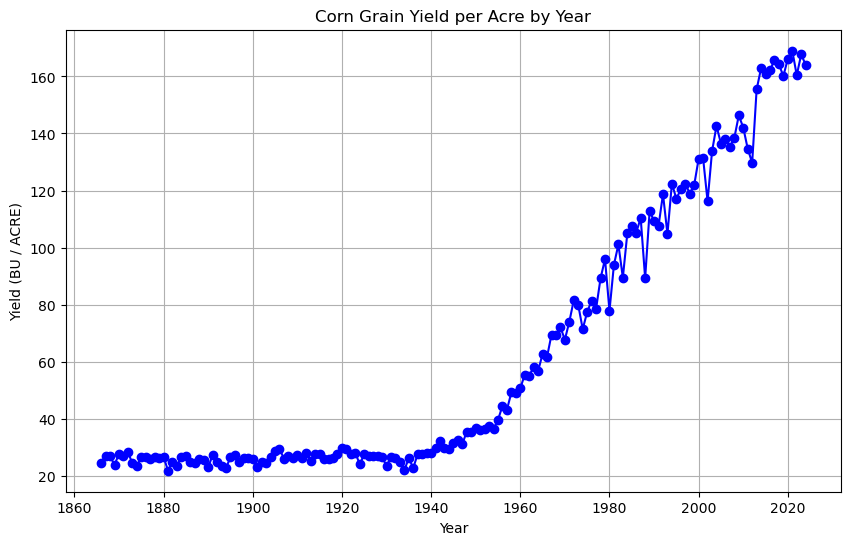

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
file_path = './Corn Yield by State(in).csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Filter to keep only relevant rows for corn yield
corn_yield_df = df[df['Data Item'] == 'CORN, GRAIN - YIELD, MEASURED IN BU / ACRE']

# Group by Year and calculate the mean yield (or sum, depending on your requirement)
yearly_yield = corn_yield_df.groupby('Year')['Value'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_yield['Year'], yearly_yield['Value'], marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Yield (BU / ACRE)')
plt.title('Corn Grain Yield per Acre by Year')
plt.grid(True)

# Show the plot
plt.show()


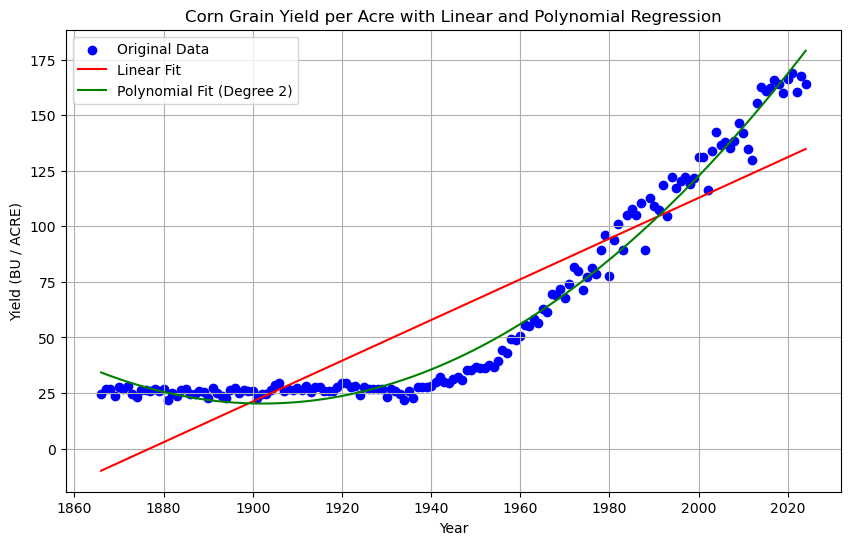

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load data from the CSV file
file_path = './Corn Yield by State(in).csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Filter to keep only relevant rows for corn yield
corn_yield_df = df[df['Data Item'] == 'CORN, GRAIN - YIELD, MEASURED IN BU / ACRE']

# Group by Year and calculate the mean yield (or sum, depending on your requirement)
yearly_yield = corn_yield_df.groupby('Year')['Value'].mean().reset_index()

# Linear regression model
X = yearly_yield['Year'].values.reshape(-1, 1)  # Features (Year)
y = yearly_yield['Value'].values  # Target (Yield)

# Fit the linear model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Predict using the linear model
y_pred_linear = linear_model.predict(X)

# Polynomial regression model (degree 2 for quadratic fit)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict using the polynomial model
y_pred_poly = poly_model.predict(X_poly)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.scatter(yearly_yield['Year'], yearly_yield['Value'], color='blue', label='Original Data')

# Plot linear regression fit
plt.plot(yearly_yield['Year'], y_pred_linear, color='red', label='Linear Fit')

# Plot polynomial regression fit
plt.plot(yearly_yield['Year'], y_pred_poly, color='green', label='Polynomial Fit (Degree 2)')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Yield (BU / ACRE)')
plt.title('Corn Grain Yield per Acre with Linear and Polynomial Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


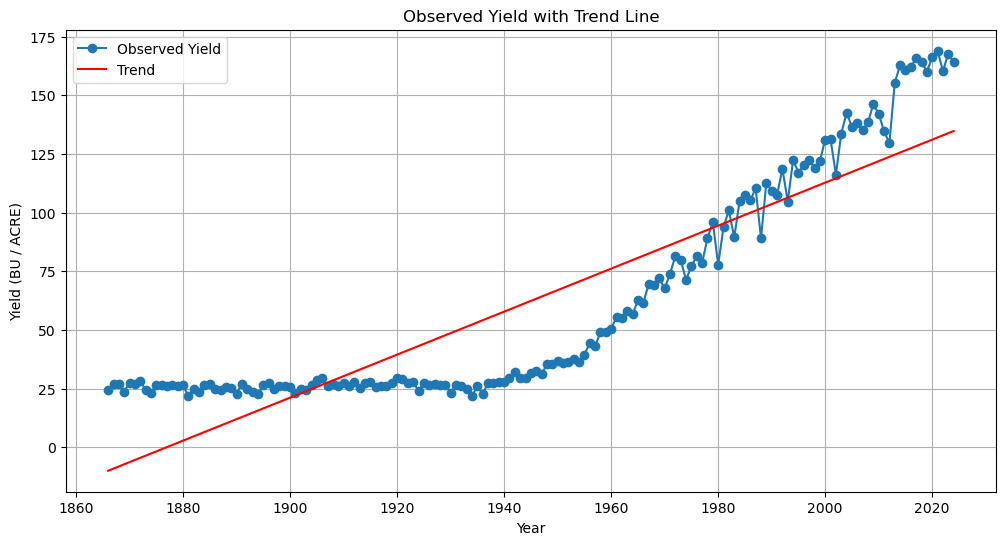

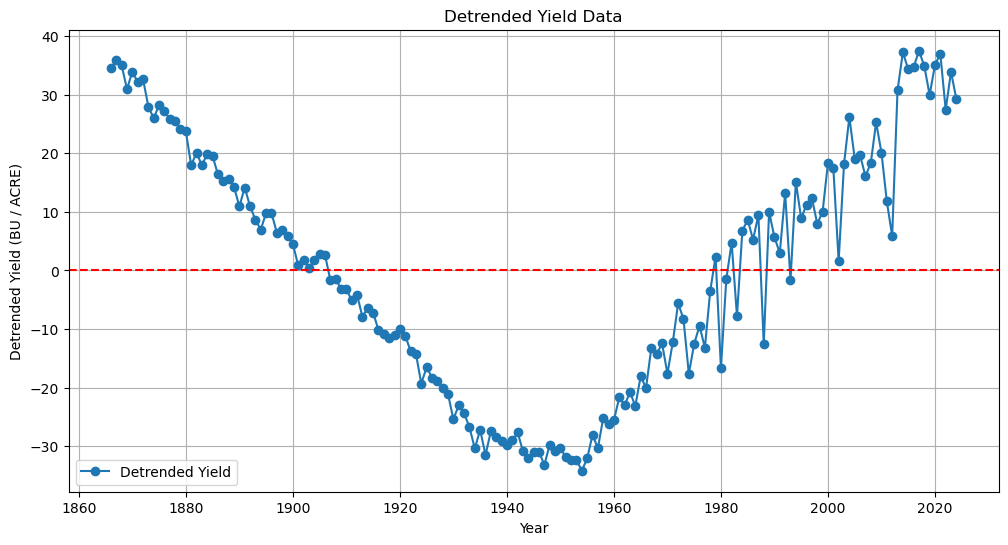

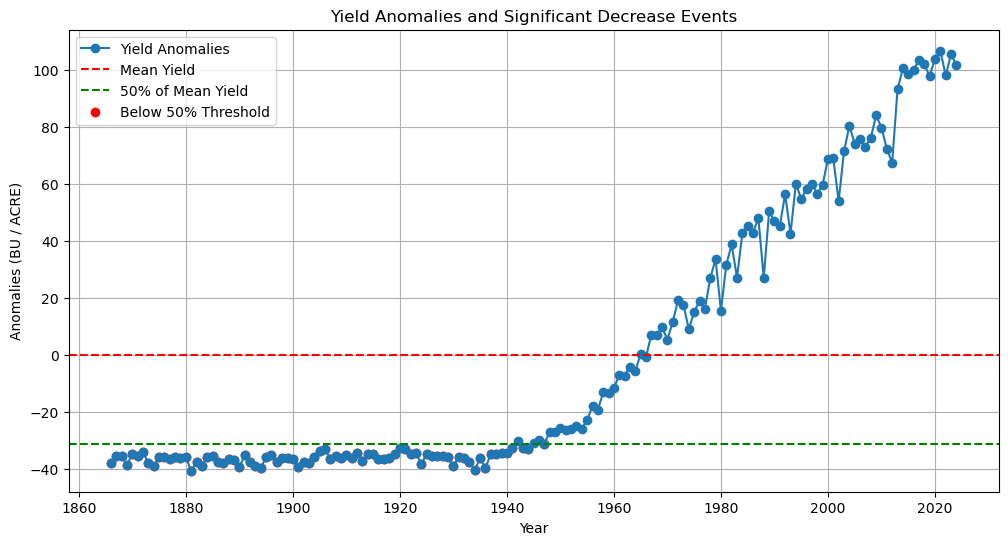

Years where the yield dropped below 50% of the mean yield:
    Year      Value
0   1866  24.562857
1   1867  26.857143
2   1868  26.877143
3   1869  23.722222
4   1870  27.597222
..   ...        ...
74  1940  28.016667
75  1941  29.747917
77  1943  29.750000
78  1944  29.450000
81  1947  31.052083

[79 rows x 2 columns]


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data from the CSV file
file_path = './Corn Yield by State(in).csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Filter to keep only relevant rows for corn yield
corn_yield_df = df[df['Data Item'] == 'CORN, GRAIN - YIELD, MEASURED IN BU / ACRE']

# Group by Year and calculate the mean yield
yearly_yield = corn_yield_df.groupby('Year')['Value'].mean().reset_index()

# Step 1: Detrend the yield data
X = yearly_yield['Year'].values.reshape(-1, 1)
y = yearly_yield['Value'].values

# Fit a linear regression model to find the trend
linear_model = LinearRegression()
linear_model.fit(X, y)

# Compute the trend values
trend = linear_model.predict(X)

# Detrend the data by subtracting the trend from the actual yield
detrended_yield = y - trend

# Step 2: Compute anomalies (as the deviation from the mean yield)
mean_yield = np.mean(y)
yield_anomalies = y - mean_yield

# Step 3: Identify years where the yield is less than 50% of the mean yield
threshold = 0.5 * mean_yield
below_threshold_years = yearly_yield[yearly_yield['Value'] < threshold]

# Plotting the results

# Original data and trend line
plt.figure(figsize=(12, 6))
plt.plot(yearly_yield['Year'], y, label='Observed Yield', marker='o')
plt.plot(yearly_yield['Year'], trend, label='Trend', color='red')
plt.title('Observed Yield with Trend Line')
plt.xlabel('Year')
plt.ylabel('Yield (BU / ACRE)')
plt.legend()
plt.grid(True)
plt.show()

# Detrended yield
plt.figure(figsize=(12, 6))
plt.plot(yearly_yield['Year'], detrended_yield, label='Detrended Yield', marker='o')
plt.axhline(0, color='red', linestyle='--')
plt.title('Detrended Yield Data')
plt.xlabel('Year')
plt.ylabel('Detrended Yield (BU / ACRE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot anomalies and highlight years with yield below 50% of the mean
plt.figure(figsize=(12, 6))
plt.plot(yearly_yield['Year'], yield_anomalies, label='Yield Anomalies', marker='o')
plt.axhline(0, color='red', linestyle='--', label='Mean Yield')
plt.axhline(-mean_yield * 0.5, color='green', linestyle='--', label='50% of Mean Yield')
plt.scatter(below_threshold_years['Year'], below_threshold_years['Value'] - mean_yield, color='red', label='Below 50% Threshold')
plt.title('Yield Anomalies and Significant Decrease Events')
plt.xlabel('Year')
plt.ylabel('Anomalies (BU / ACRE)')
plt.legend()
plt.grid(True)
plt.show()

# Print the years where the yield dropped below 50% of the mean
print("Years where the yield dropped below 50% of the mean yield:")
print(below_threshold_years[['Year', 'Value']])


In [ ]:
from sklear

In [3]:
import pandas as pd
df= pd.read_csv('./Corn Yield by County 1940-2023(in).csv')

In [4]:
df.head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2023,YEAR,NaN,COUNTY,ALABAMA,1,NaN,99,OTHER COUNTIES,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,143.7,3.0
1,SURVEY,2023,YEAR,NaN,COUNTY,ALABAMA,1,BLACK BELT,40,DALLAS,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,133.0,8.7
2,SURVEY,2023,YEAR,NaN,COUNTY,ALABAMA,1,BLACK BELT,40,ELMORE,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,133.8,11.0
3,SURVEY,2023,YEAR,NaN,COUNTY,ALABAMA,1,BLACK BELT,40,MACON,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,138.6,9.2
4,SURVEY,2023,YEAR,NaN,COUNTY,ALABAMA,1,BLACK BELT,40,MARENGO,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,115.3,15.8


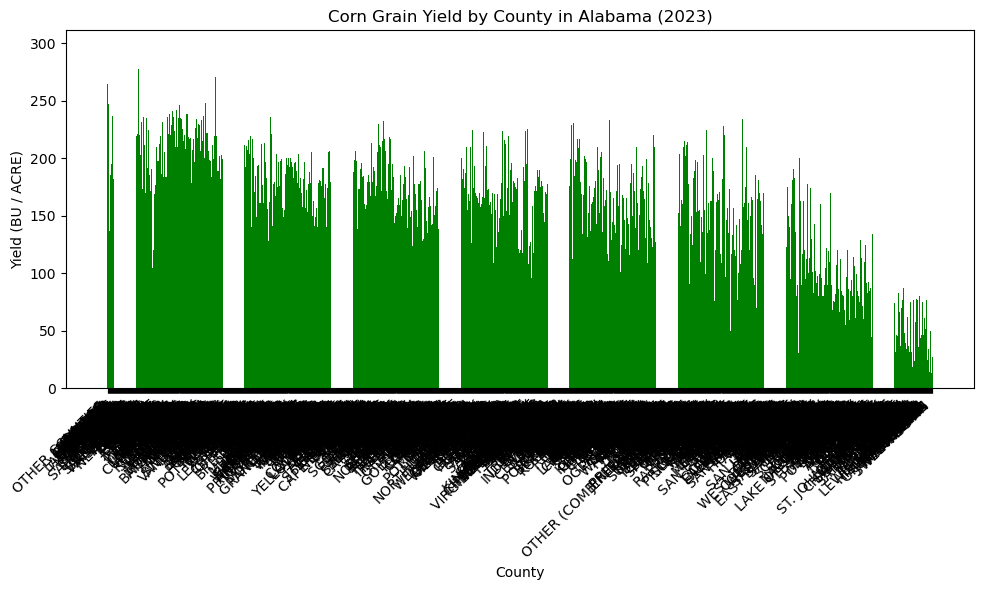

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
file_path = './Corn Yield by County 1940-2023(in).csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Filter only necessary columns for visualization
yield_data = df[['County', 'Value']]

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(yield_data['County'], yield_data['Value'], color='green')
plt.xlabel('County')
plt.ylabel('Yield (BU / ACRE)')
plt.title('Corn Grain Yield by County in Alabama (2023)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


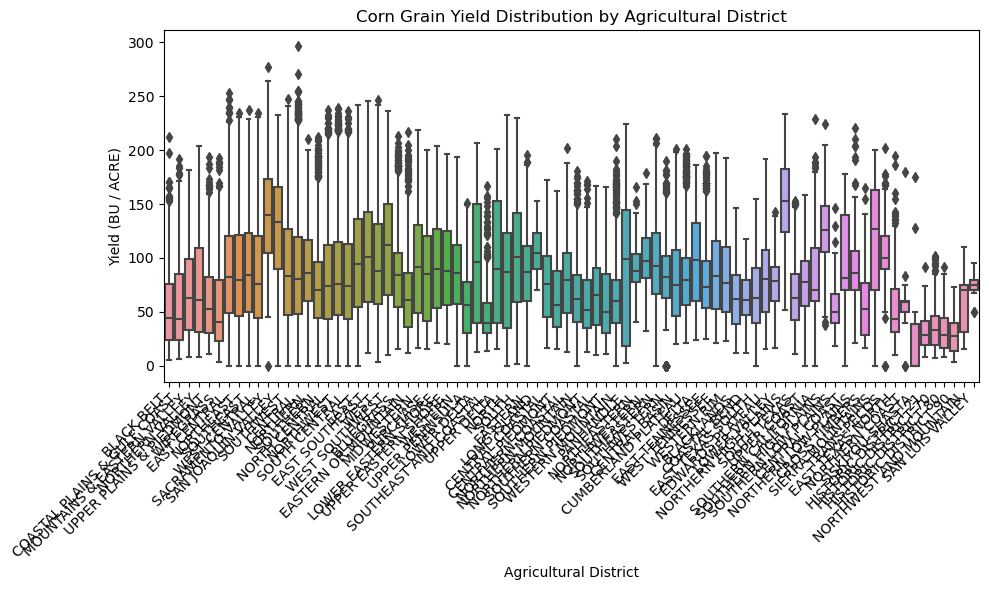

In [7]:
import seaborn as sns

# Box plot to show yield distribution by agricultural district
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ag District', y='Value', data=df)
plt.xlabel('Agricultural District')
plt.ylabel('Yield (BU / ACRE)')
plt.title('Corn Grain Yield Distribution by Agricultural District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


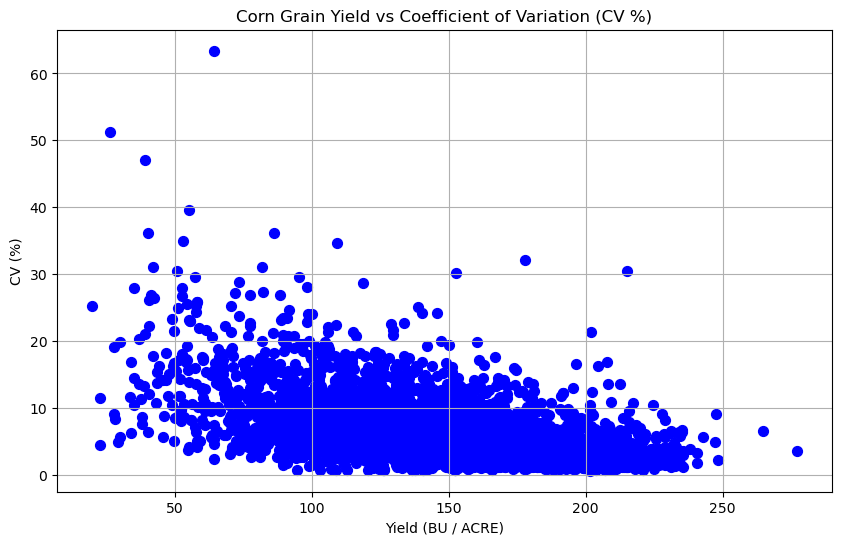

In [8]:
# Scatter plot to show yield vs CV%
plt.figure(figsize=(10, 6))
plt.scatter(df['Value'], df['CV (%)'], color='blue', s=50)
plt.xlabel('Yield (BU / ACRE)')
plt.ylabel('CV (%)')
plt.title('Corn Grain Yield vs Coefficient of Variation (CV %)')
plt.grid(True)

# Show the plot
plt.show()


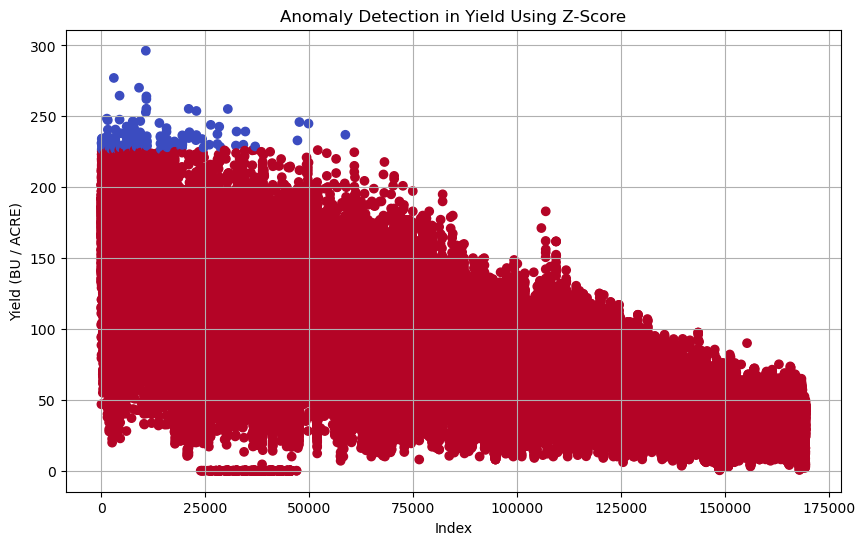

In [11]:
import pandas as pd
import numpy as np

# Load your yield data (replace with the actual file path)
file_path = './Corn Yield by County 1940-2023(in).csv'
df = pd.read_csv(file_path)

# Calculate the Z-score for yield values
df['Z-Score'] = (df['Value'] - df['Value'].mean()) / df['Value'].std()

# Define a threshold for detecting anomalies (e.g., Z-score > 3 or < -3)
threshold = 3
df['Anomaly'] = np.where((df['Z-Score'] > threshold) | (df['Z-Score'] < -threshold), -1, 1)

# Visualize anomalies
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Value'], c=df['Anomaly'], cmap='coolwarm', label='Anomalies')
plt.xlabel('Index')
plt.ylabel('Yield (BU / ACRE)')
plt.title('Anomaly Detection in Yield Using Z-Score')
plt.grid(True)
plt.show()
